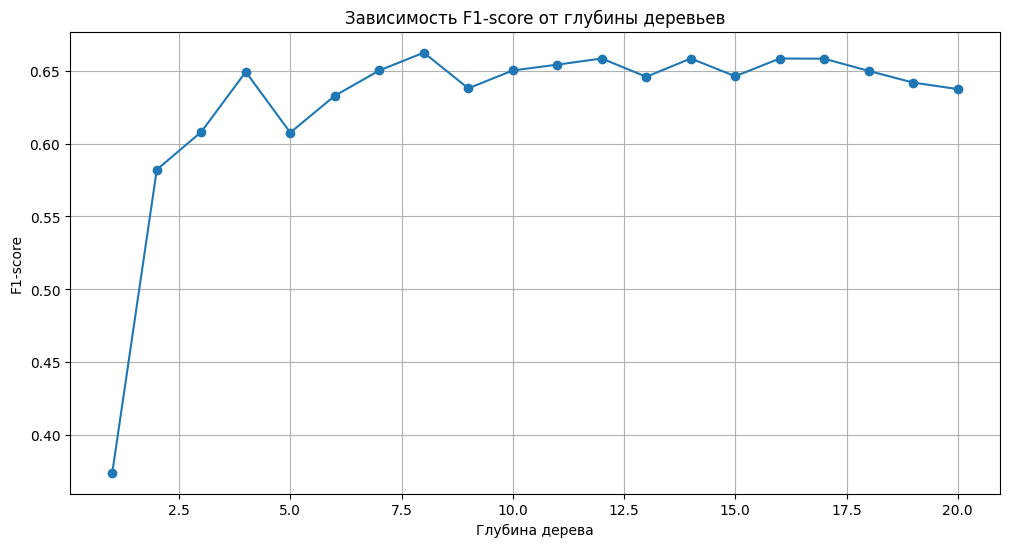

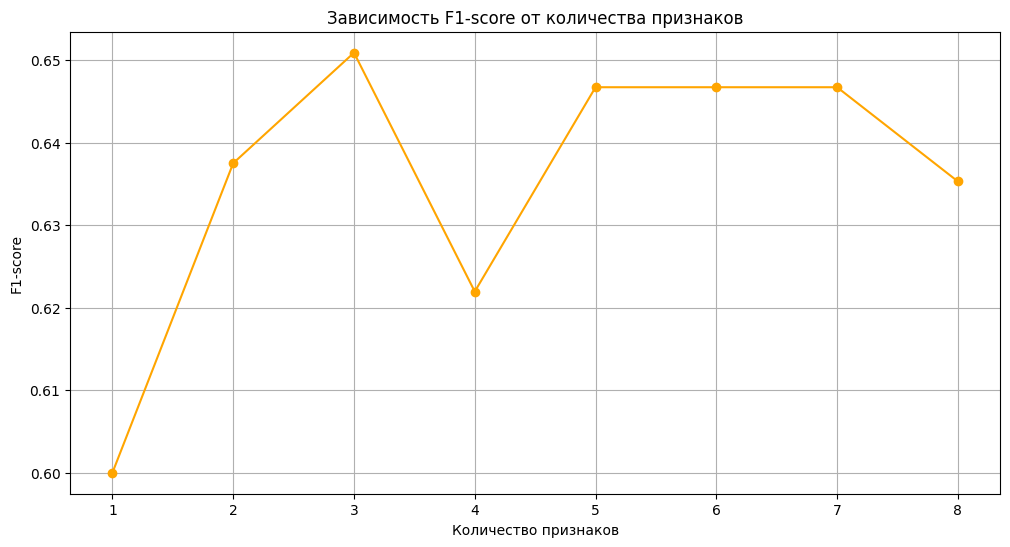

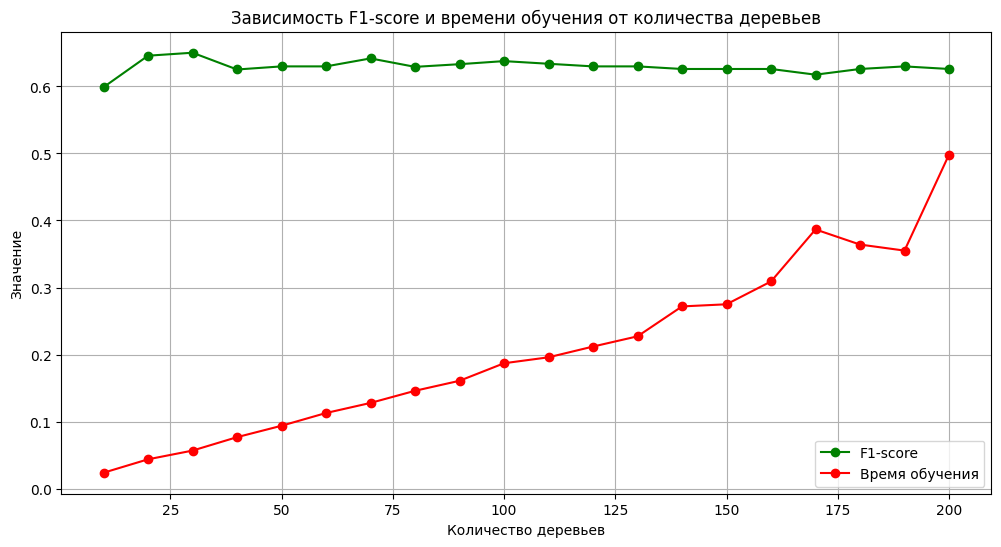


Сравнение моделей:
Random Forest (лучший F1): 0.663
XGBoost F1: 0.635

Время обучения XGBoost: 0.09 сек
Среднее время обучения RF: 0.21 сек


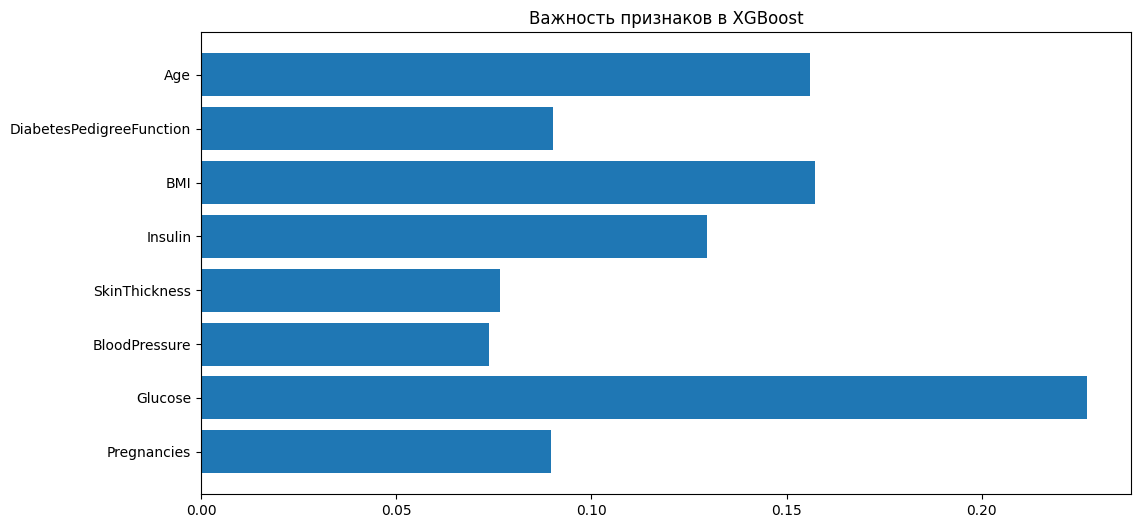

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score
from xgboost import XGBClassifier
import time

data = pd.read_csv('diabetes.csv')

zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for feature in zero_features:
    data[feature] = data[feature].replace(0, np.nan)
    data[feature].fillna(data[feature].mean(), inplace=True)

X = data.drop('Outcome', axis=1)
y = data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# 1.1 Исследование зависимости качества от глубины деревьев
depth_values = range(1, 21)
f1_scores_depth = []
times_depth = []

for depth in depth_values:
    start_time = time.time()
    model = RandomForestClassifier(max_depth=depth, n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    
    f1_scores_depth.append(f1_score(y_test, preds))
    times_depth.append(time.time() - start_time)

plt.figure(figsize=(12, 6))
plt.plot(depth_values, f1_scores_depth, marker='o')
plt.title('Зависимость F1-score от глубины деревьев')
plt.xlabel('Глубина дерева')
plt.ylabel('F1-score')
plt.grid()
plt.show()

# 1.2 Исследование зависимости от количества признаков
feature_values = range(1, X.shape[1]+1)
f1_scores_feat = []
times_feat = []

for feat in feature_values:
    start_time = time.time()
    model = RandomForestClassifier(max_features=feat, n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    
    f1_scores_feat.append(f1_score(y_test, preds))
    times_feat.append(time.time() - start_time)

plt.figure(figsize=(12, 6))
plt.plot(feature_values, f1_scores_feat, marker='o', color='orange')
plt.title('Зависимость F1-score от количества признаков')
plt.xlabel('Количество признаков')
plt.ylabel('F1-score')
plt.grid()
plt.show()

# 1.3 Исследование зависимости от количества деревьев
tree_values = range(10, 210, 10)
f1_scores_trees = []
times_trees = []

for n in tree_values:
    start_time = time.time()
    model = RandomForestClassifier(n_estimators=n, random_state=42)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    
    f1_scores_trees.append(f1_score(y_test, preds))
    times_trees.append(time.time() - start_time)

plt.figure(figsize=(12, 6))
plt.plot(tree_values, f1_scores_trees, marker='o', color='green', label='F1-score')
plt.plot(tree_values, times_trees, marker='o', color='red', label='Время обучения')
plt.title('Зависимость F1-score и времени обучения от количества деревьев')
plt.xlabel('Количество деревьев')
plt.ylabel('Значение')
plt.legend()
plt.grid()
plt.show()


# Подбор параметров
params = {
    'learning_rate': 0.2,
    'max_depth': 3,
    'n_estimators': 150,
    'subsample': 0.9,
    'colsample_bytree': 0.9,
    'objective': 'binary:logistic'
}

start_time = time.time()
xgb_model = XGBClassifier(**params)
xgb_model.fit(X_train, y_train)
xgb_time = time.time() - start_time

xgb_preds = xgb_model.predict(X_test)
xgb_f1 = f1_score(y_test, xgb_preds)


print('\nСравнение моделей:')
print(f"Random Forest (лучший F1): {max(f1_scores_depth):.3f}")
print(f"XGBoost F1: {xgb_f1:.3f}")
print(f"\nВремя обучения XGBoost: {xgb_time:.2f} сек")
print(f"Среднее время обучения RF: {np.mean(times_trees):.2f} сек")

plt.figure(figsize=(12, 6))
plt.barh(X.columns, xgb_model.feature_importances_)
plt.title('Важность признаков в XGBoost')
plt.show()

Для данной задачи предпочтительнее Random Forest, так как он обеспечивает более высокое качество классификации без дополнительных настроек. Однако XGBoost демонстрирует потенциал для улучшения при оптимизации параметров.